In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
filename = "allStatesDataCohort.csv"

df = pd.read_csv(filename)
df.head()

C:\Users\rekik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,PCIP01,PCIP03,PCIP09,...,PCIP27,PCIP29,PCIP40,PCIP41,PCIP42,PCIP47,D150_4,D150_L4,year,cohort
0,100636,01230800,12308,Community College of the Air Force,Montgomery,AL,36114-3011,0.0000,0.0000,0.0029,...,0.0000,0.0463,0.0084,0.0022,0.0000,0.1984,0.0,0.0,1997,0.0
1,100654,00100200,1002,Alabama A & M University,Normal,AL,35762,0.0323,0.0323,0.0000,...,0.0136,0.0000,0.0068,0.0000,0.0255,0.0000,0.0,0.0,1997,0.0
2,100663,00105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,0.0000,0.0000,0.0263,...,0.0064,0.0000,0.0096,0.0000,0.0797,0.0000,0.0,0.0,1997,0.0
3,100690,02503400,25034,Amridge University,Montgomery,AL,36117-3553,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,1997,0.0
4,100706,00105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,0.0000,0.0000,0.0000,...,0.0102,0.0000,0.0203,0.0000,0.0135,0.0000,0.0,0.0,1997,0.0


In [3]:
dfpcip = df['PCIP01']+df['PCIP03']+df['PCIP26']+df['PCIP29']+df['PCIP40']+df['PCIP42']+df['PCIP09']+df['PCIP10']+df['PCIP11']+df['PCIP41']+df['PCIP47']+df['PCIP14']+df['PCIP15']+df['PCIP27']


In [4]:
df['SCiTot'] = (df['PCIP01']+df['PCIP03']+df['PCIP26']+df['PCIP29']+df['PCIP40']+df['PCIP42'])*df['cohort']
df['TechTot'] = (df['PCIP09']+df['PCIP10']+df['PCIP11']+df['PCIP41']+df['PCIP47'])*df['cohort']
df['EngTot'] = (df['PCIP14']+df['PCIP15'])*df['cohort']
df['MathTot'] = (df['PCIP27'])*df['cohort']

In [5]:
df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'PCIP01', 'PCIP03', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP14', 'PCIP15',
       'PCIP26', 'PCIP27', 'PCIP29', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP47',
       'D150_4', 'D150_L4', 'year', 'cohort', 'SCiTot', 'TechTot', 'EngTot',
       'MathTot'],
      dtype='object')

In [6]:
stemdf = df.iloc[:,[3,25,26,27,28]]

In [7]:
stemdf.columns

Index(['INSTNM', 'SCiTot', 'TechTot', 'EngTot', 'MathTot'], dtype='object')

In [8]:
stemdf['stemTotal']= stemdf['SCiTot'] + stemdf['TechTot'] + stemdf['EngTot'] + stemdf['MathTot']

C:\Users\rekik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
stemdf = stemdf[stemdf.stemTotal != 0]

In [10]:

stemdf.head()

,INSTNM,SCiTot,TechTot,EngTot,MathTot,stemTotal
3233,Alabama A & M University,185.2340,85.8500,151.5000,8.3830,430.9670
3234,University of Alabama at Birmingham,143.2673,41.3217,46.2878,5.4346,236.3114
3235,ALABAMA AVIATION AND TECHNICAL COLLEGE,0.0000,31.8010,13.9552,0.0000,45.7562
3237,University of Alabama in Huntsville,29.0904,12.9456,109.3308,13.5780,164.9448
3238,Alabama State University,176.9300,130.7800,0.0000,41.0800,348.7900


In [11]:
stemdf.shape

(56244, 6)

In [12]:
#basic Stats for our file
stemdf.describe()

,SCiTot,TechTot,EngTot,MathTot,stemTotal
count,56244.000000,56244.000000,56244.000000,56244.000000,56244.000000
mean,74.606724,58.518131,41.354560,5.333124,179.812540
std,158.480421,141.129532,110.547409,13.045456,336.677561
min,0.000000,0.000000,0.000000,0.000000,0.005400
25%,0.000000,7.308000,0.000000,0.000000,26.742000
50%,17.939900,25.047500,2.022200,0.000000,78.454350
75%,81.306400,65.684650,33.177225,5.740575,186.671625
max,2512.654800,12741.811200,2218.811000,370.044900,13704.083400


In [13]:
#corr = stemdf.corr()
#sns.heatmap(corr, vmin =-1, annot = True)

In [14]:
pcipdf = df.iloc[:,[7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
#pcipdf['stemTotal'] = df['PCIP01']+df['PCIP03']+df['PCIP26']+df['PCIP29']+df['PCIP40']+df['PCIP42']+df['PCIP09']+df['PCIP10']+df['PCIP11']+df['PCIP41']+df['PCIP47']+df['PCIP14']+df['PCIP15']+df['PCIP27']

In [15]:
pcipdf.columns

Index(['PCIP01', 'PCIP03', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP14', 'PCIP15',
       'PCIP26', 'PCIP27', 'PCIP29', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP47'],
      dtype='object')

In [16]:
pcipdf['stemTotal'] = pcipdf['PCIP01']+pcipdf['PCIP03']+pcipdf['PCIP09']+pcipdf['PCIP10']+pcipdf['PCIP11']+pcipdf['PCIP14']+pcipdf['PCIP15']+pcipdf['PCIP26']+pcipdf['PCIP27']+pcipdf['PCIP29']+pcipdf['PCIP40']+pcipdf['PCIP41']+pcipdf['PCIP42']+pcipdf['PCIP47']

C:\Users\rekik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
pcipdf.shape

(76600, 15)

In [18]:
pcipdf = pcipdf[(pcipdf.T != 0).any()]

In [19]:
pcipdf.shape

(62819, 15)

In [20]:
pcipdf.head()

,PCIP01,PCIP03,PCIP09,PCIP10,PCIP11,PCIP14,PCIP15,PCIP26,PCIP27,PCIP29,PCIP40,PCIP41,PCIP42,PCIP47,stemTotal
0,0.0000,0.0000,0.0029,0.0367,0.0122,0.0000,0.1590,0.0000,0.0000,0.0463,0.0084,0.0022,0.0000,0.1984,0.4661
1,0.0323,0.0323,0.0000,0.0390,0.0662,0.0136,0.1579,0.0594,0.0136,0.0000,0.0068,0.0000,0.0255,0.0000,0.4466
2,0.0000,0.0000,0.0263,0.0000,0.0225,0.0553,0.0000,0.0739,0.0064,0.0000,0.0096,0.0000,0.0797,0.0000,0.2737
4,0.0000,0.0000,0.0000,0.0000,0.0457,0.3113,0.0000,0.0406,0.0102,0.0000,0.0203,0.0000,0.0135,0.0000,0.4416
5,0.0000,0.0000,0.0619,0.0000,0.1143,0.0000,0.0000,0.0595,0.0214,0.0000,0.0167,0.0000,0.0619,0.0000,0.3357


In [23]:
pcipdf.describe()

,PCIP01,PCIP03,PCIP09,PCIP10,PCIP11,PCIP14,PCIP15,PCIP26,PCIP27,PCIP29,PCIP40,PCIP41,PCIP42,PCIP47,stemTotal
count,62819.000000,62819.000000,62819.000000,62819.000000,62819.000000,62819.000000,62819.000000,62819.000000,62819.000000,62819.000000,62819.000000,62819.000000,62819.000000,62819.000000,62819.000000
mean,0.007081,0.005523,0.022274,0.005250,0.053573,0.018332,0.042149,0.031369,0.006155,0.000127,0.008888,0.000963,0.039009,0.013175,0.253868
std,0.034005,0.027709,0.039169,0.037556,0.103787,0.073507,0.123997,0.062586,0.010967,0.005285,0.024942,0.009852,0.068424,0.057862,0.207115
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000600
25%,0.000000,0.000000,0.000000,0.000000,0.006200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117700
50%,0.000000,0.000000,0.000000,0.000000,0.021600,0.000000,0.000000,0.006600,0.000000,0.000000,0.000000,0.000000,0.015700,0.000000,0.207200
75%,0.000000,0.000000,0.035500,0.000000,0.050000,0.001250,0.028800,0.046600,0.009000,0.000000,0.011300,0.000000,0.061700,0.000000,0.313500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.480700,1.000000,0.800000,1.000000,1.000000,1.000100


In [21]:
#pcipdf = dfpcip[dfpcip.stemTotal != 0]

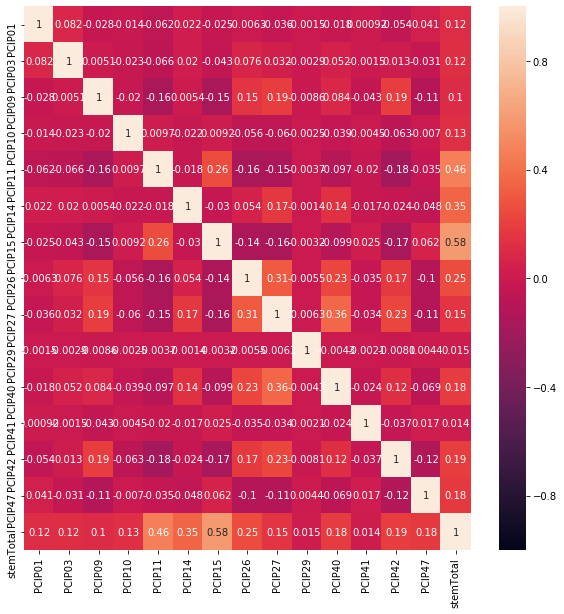

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
corr = pcipdf.corr()
sns.heatmap(corr, vmin =-1, annot = True)
